## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 


In [1]:
# Импорт библиотеки pandas.
import pandas as pd 

# Импорт библиотеки matplotlib.
import matplotlib.pyplot as plt

# Чтение файла с данными и сохранение в df.
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv') 
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv') 

# Прописываем настройки чтобы избавиться от лишних запятых при работе метода `describe` и убрать экспонентациальные формы
pd.set_option('display.float_format', '{:,.2f}'.format)

# Получение первых 5 строк таблицы df.
display(mkrf_movies.head())
display(mkrf_shows.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [2]:
# Получение общей информации о данных в таблице df.
display(mkrf_movies.info(10))
display(mkrf_shows.info(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

- В таблице mkrf_movies 15 столбцов, тип данных столбцов - float64(3), object(12). Количество значений в столбцах различается, значит в данных есть пропущенные значения;
- В таблице mkrf_shows 2 столбца, тип данных столбцов - float64(1), int(1). Количество значений в столбцах равное, значит в данных пропущенных значений нет.

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. Столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.Согласно документации:
- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.

Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах. Согласно документации:
- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.

Для того, чтобы объединить таблицы mkrf_movies и mkrf_shows, необходимо привести к одинаковыму типу данных столбцы, по которому будем соединять датафреймы. Этим столбцом является puNumber. В mkrf_movies тип данных object, в mkrf_shows - int64.

In [3]:
# Приведем тип данных столбца puNumber в mkrf_shows к типу object.
mkrf_shows['puNumber'] = mkrf_shows['puNumber'].astype('str')

display(mkrf_movies.info())
display(mkrf_shows.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null object
box_office    3158 non-null float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


None

In [4]:
# Объединяем таблицы методом merge по столбцу puNumber
mkrf_new = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')

# получение первых 5 строк таблицы mkrf_new.
mkrf_new.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама",nan
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный",nan
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [5]:
# Меняем тип данных в столбце show_start_date на datetime.  
mkrf_new['show_start_date'] = pd.to_datetime(mkrf_new['show_start_date'], format='%Y-%m-%d %H:%M')

# Меняем тип данных в столбце ratings на float.
mkrf_new['ratings'] = pd.to_numeric(mkrf_new['ratings'], errors='coerce')

mkrf_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null datetime64[ns, UTC]
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6490 non-null float64
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns, UTC](1), float64(5), object(10)
memory usage: 994.2+ KB


#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [6]:
# Подсчёт пропусков.
mkrf_new.isna().sum().to_frame() 

,0
title,0
puNumber,0
show_start_date,0
type,0
film_studio,18
production_country,2
director,9
producer,568
age_restriction,0
refundable_support,7154


In [7]:
# Подсчёт пропусков в процентах.
mkrf_new.isna().mean().to_frame()*100

,0
title,0.00
puNumber,0.00
show_start_date,0.00
type,0.00
film_studio,0.24
production_country,0.03
director,0.12
producer,7.59
age_restriction,0.00
refundable_support,95.57


In [8]:
# Заменяем пропуски в столбцах film_studio, production_country, director, producer, genres
# на unknown
mkrf_new = mkrf_new.fillna(
    {'film_studio':'unknown', 'production_country':'unknown', 
     'director':'unknown', 'producer':'unknown', 'genres':'unknown'}
) 

Заменили пропуски в столбцах film_studio, production_country, director, producer, genresна unknown. В столбеце ratings 13% пропусков, можно попробовать заполнить медианным значением, если не сильно повлияет на конечный результат.

In [9]:
# Получаем числовое описание столбца ratings
mkrf_new['ratings'].describe()

count   6,490.00
mean        6.48
std         1.10
min         1.00
25%         5.90
50%         6.60
75%         7.20
max         9.20
Name: ratings, dtype: float64

In [10]:
# Заполняем пропуски в столбце ratings медианным значением 6.6
mkrf_new['ratings'] = mkrf_new['ratings'].fillna(6.6)

In [11]:
# Проверяем изменения, получаем числовое описание столбца ratings
mkrf_new['ratings'].describe()

count   7,486.00
mean        6.50
std         1.03
min         1.00
25%         6.00
50%         6.60
75%         7.10
max         9.20
Name: ratings, dtype: float64

В столбце ratings до заполнения пропусков медиана 6.6, а среднее 6.48, а после заполнения медианным значением среднее 6.50, а медиана 6.6. Изменения можно считать незначительными, поэтому заполнение пропусков медианным значением можно оставить.

In [12]:
# Подсчёт пропусков.
mkrf_new.isna().sum().to_frame() 

,0
title,0
puNumber,0
show_start_date,0
type,0
film_studio,0
production_country,0
director,0
producer,0
age_restriction,0
refundable_support,7154


#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [13]:
# Поиск явных дубликатов.
mkrf_new.duplicated().sum()

0

In [14]:
mkrf_new['title'].duplicated().sum()

714

In [15]:
# Изучаем уникальные значения и их количество в столбце title.
mkrf_new['title'].value_counts().sort_values(ascending=False).head()

День святого Валентина_                 5
Начало_                                 4
Кошмар на улице Вязов /Фильм ужасов/    4
Двойной копец                           4
Рапунцель: Запутанная история           4
Name: title, dtype: int64

In [16]:
# Просматриваем срез фильма День святого Валентина
display(mkrf_new.query('title == "День святого Валентина_"').head(3))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3902,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.70,"мелодрама,комедия",nan
3991,День святого Валентина_,221068010,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.70,"мелодрама,комедия",nan
4070,День святого Валентина_,121002210,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.70,"мелодрама,комедия",nan


При поиске явных дубликатов методом duplicated() установлено, что дубликатов нет. Однако при поиске дубликатов в столбце title обнаружено 714 дубликатов названий фильмов. При просмотре среза названий фильмов установлено, что в таблице имеются фильмы с одинаковым названием, но у них разные номера прокатных удостоверений и даты премьеры фильма. Это свидетельствует о том, что один и тот же фильм показывали в кинотеатрах несколько раз.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [17]:
# Выводим количество уникальных значений
mkrf_new['type'].value_counts()

Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

В поле type есть несколько значений, у которых появился пробел в начале строки. 

In [18]:
# Удаляем пробелы в начале строк в столбце type.
mkrf_new['type'] = mkrf_new['type'].str.strip()

mkrf_new['type'].value_counts()

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [19]:
mkrf_new[['budget', 'refundable_support', 'nonrefundable_support']].sort_values('budget', ascending=False).head()

,budget,refundable_support,nonrefundable_support
7114,"2,305,074,303.00","180,000,000.00","90,000,000.00"
5437,"1,032,905,957.00","110,000,000.00","190,000,000.00"
7464,"980,000,000.00","100,000,000.00","400,000,000.00"
7474,"944,000,000.00","100,000,000.00","400,000,000.00"
7171,"779,941,965.00",0.00,"60,000,000.00"


In [20]:
mkrf_new[['budget', 'refundable_support', 'nonrefundable_support']].sort_values('budget').head(10)

,budget,refundable_support,nonrefundable_support
2532,0.00,"20,000,000.00",0.00
3675,0.00,"20,000,000.00","20,000,000.00"
2874,0.00,0.00,"6,000,000.00"
2058,0.00,0.00,"75,000,000.00"
2053,0.00,0.00,"23,000,000.00"
3739,0.00,"25,000,000.00","20,000,000.00"
3047,0.00,"19,000,000.00","51,000,000.00"
5673,0.00,"20,000,000.00","40,000,000.00"
6323,0.00,0.00,"138,969,465.00"
2788,0.00,0.00,"35,000,000.00"


Столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. Но есть часть данных, в которых бюджет=0, при этом указан объём возвратных и невозвратных средств государственной поддержки. Указанные значения не могут быть меньше объём возвратных и невозвратных средств государственной поддержки, их нужно заменить.

In [21]:
# Заменим значения = 0 в столбце budget на сумму значений столбцов refundable_support, nonrefundable_support
mkrf_new['budget'] = (mkrf_new['budget']
    .where(mkrf_new['budget'] !=0, mkrf_new['refundable_support'] + mkrf_new['nonrefundable_support'])
)

In [22]:
mkrf_new[['budget', 'refundable_support', 'nonrefundable_support']].sort_values('budget').head()

,budget,refundable_support,nonrefundable_support
2874,"6,000,000.00",0.00,"6,000,000.00"
3139,"14,462,464.00",0.00,"4,700,000.00"
7042,"15,010,000.00",0.00,"10,000,000.00"
5576,"18,166,418.00",0.00,"8,000,000.00"
3711,"18,706,080.00",0.00,"11,520,000.00"


#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [23]:
# Добавляем столбец с годом проката.   
mkrf_new['show_start_year'] = mkrf_new['show_start_date'].dt.year

mkrf_new.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.20,"боевик,драма,мелодрама",nan,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",nan,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [24]:
# создаем функцию для создания столбцов с первыми значениями из списка
def func(column):
    return column.split(',')[0]


In [25]:
# Создаем столбцы с первыми значения из списка режиссёров и жанров соответственно.
mkrf_new['name_producer'] = mkrf_new['producer'].apply(func)
mkrf_new['name_genres'] = mkrf_new['genres'].apply(func)

mkrf_new.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,name_producer,name_genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.20,"боевик,драма,мелодрама",nan,2015,Дэвид Валдес,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",nan,2016,unknown,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,2016,Джим Лемли,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [26]:
# Создаем столбец, который содержит долю осударственной  поддержки от общего бюджета фильма.
mkrf_new['state_support'] = (mkrf_new['refundable_support'] + mkrf_new['nonrefundable_support']) / mkrf_new['budget'] * 100

# Сортируем mkrf_new по столбцу state_support в порядке убывания.
mkrf_new.sort_values('state_support', ascending=False).head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,name_producer,name_genres,state_support
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00","6,000,000.00",Министерство культуры,4.30,комедия,"15,362,931.43",2016,"ООО ""КиноФирма""",комедия,100.00
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00","70,000,000.00",Фонд кино,6.30,"комедия,мелодрама","70,299,052.00",2016,Ф.Бондарчук,комедия,100.00
6323,Баба Яга,114006518,2018-11-08 12:00:00+00:00,Анимационный,"ООО ""Арт Пикчерс Студия""",Россия,В.Саков,"ООО ""Арт Пикчерс Студия"", ООО ""КРИЭЙТИВ АНИМЭЙ...",«6+» - для детей старше 6 лет,0.00,"138,969,465.00","138,969,465.00",Фонд кино,6.60,unknown,"1,334,699.40",2018,"ООО ""Арт Пикчерс Студия""",unknown,100.00
6823,Большое путешествие,114002419,2019-04-20 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"Н.Лопато, В.Ровенский","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,"60,000,000.00","120,000,000.00","180,000,000.00",Фонд кино,6.20,"мультфильм,комедия,приключения","147,606,826.51",2019,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",мультфильм,100.00
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,"20,000,000.00",Фонд кино,6.20,"комедия,фэнтези","67,418,974.80",2015,Т.Вайнштейн,комедия,100.00


In [27]:
# Получаем числовое описание столбца state_support.
mkrf_new['state_support'].describe()

count   332.00
mean     54.21
std      19.69
min       4.40
25%      38.46
50%      61.40
75%      66.14
max     100.00
Name: state_support, dtype: float64

In [28]:
# Получаем уникальные значения столбца state_support и количество их упоминаний
mkrf_new['state_support'].value_counts()

100.00    17
64.94      6
50.00      5
66.67      5
65.79      5
          ..
16.66      1
65.62      1
66.66      1
43.49      1
57.21      1
Name: state_support, Length: 282, dtype: int64

Всего имеется 332 фильма с государственной поддержкой. В среднем государственная поддержка составляет 54.21% от общего бюджета, однако медиана составляет 61,4%. При этом у 17 фильмов из 332 доля государственной поддержки составляет 100%.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

<bound method Series.to_frame of 2010    985
2019    930
2018    891
2016    818
2014    807
2015    705
2013    630
2011    622
2012    593
2017    505
Name: show_start_year, dtype: int64>

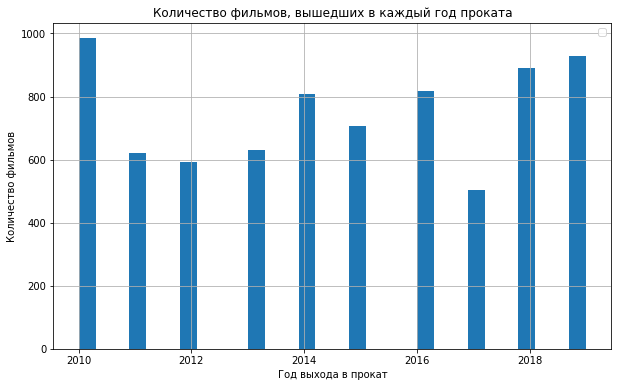

In [29]:
# Получаем уникальные значения столбца show_start_year и количество их упоминаний
display(mkrf_new['show_start_year'].value_counts().to_frame)

# Строим гистограмму по количеству фильмов, вышедших в каждый год проката.
mkrf_new.plot(y='show_start_year', kind='hist', bins=30, grid=True, figsize=(10,6))
plt.title('Количество фильмов, вышедших в каждый год проката')
plt.xlabel('Год выхода в прокат')
plt.ylabel('Количество фильмов')
plt.legend([])

2010 является рекордным годом по количеству фильмов, вышедших в прокат - 985 фильмов. В 2011-2013 годах был застой, в эти года выходило по 590-630 фильмов, после чего в 2014 был рост до 807 с коррекцией в 2015 до 705, в 2016 значения вернулись до 818. В 2017 был большой спад, в прокат вышло всего 505 фильмов, что сало абсолютным минимумом за десятилетие. В 2018-2019 количество фильмов, вышедших в прокат, начало расти и стремится к уровну 2010 г. 

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [30]:
# Группируем по show_start_year и сравниваем значение с box_office, применяем метод sum.
mkrf_new.groupby('show_start_year')['box_office'].sum()

show_start_year
2010        2,428,654.00
2011       14,102,765.00
2012        6,955,423.00
2013       29,799,706.20
2014    7,444,951,859.20
2015   39,497,365,196.40
2016   47,866,299,741.91
2017   48,563,707,217.51
2018   49,668,403,134.32
2019   48,425,708,779.59
Name: box_office, dtype: float64

Text(0, 0.5, 'Сумма сборов')

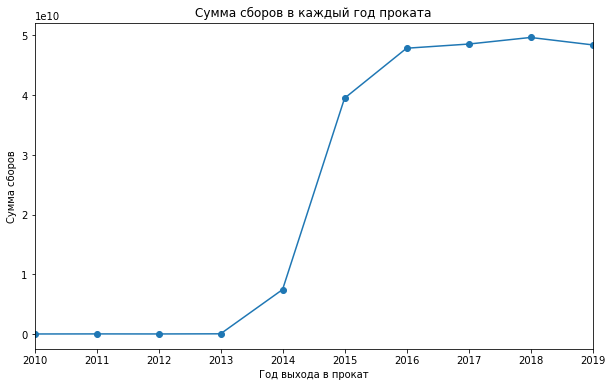

In [31]:
# Строим график суммы сборов по годам.
(mkrf_new
    .groupby('show_start_year')['box_office'].sum()
    .plot(x='show_start_year', y='box_office', style='o-', figsize=(10,6)))

plt.title('Сумма сборов в каждый год проката')
plt.xlabel('Год выхода в прокат')
plt.ylabel('Сумма сборов')

С 2013 по 2017 наблюдался рост сборов от прокатов фильмов. с 2017 г. сборы от проката примерно одинаковые. Минимальная сумма сборов зафиксирорвана в 2010 г., а максимальная в 2018 г. Однако эти данные не могут считаться объективными, так как имеется 57% пропусков в столбце со сборами. К тому же, 2010 г. был рекордным по количеству прокатов фильмов, даже с учетом инфляции сумма сборов в 2010 не может быть минимальной.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [32]:
# Создаем сводную таблицу для столбцов show_start_year, box_office,
# считаем среднее и медиану.
median_box_office = mkrf_new.pivot_table(index='show_start_year', values='box_office', aggfunc = ['mean', 'median'])

# Переименовываем названия столбцов
median_box_office.columns = ['mean', 'median']

# Выводим median_box_office.
median_box_office

,mean,median
show_start_year,,
2010,"23,130.04","1,700.00"
2011,"129,383.17","3,000.00"
2012,"54,339.24","5,660.00"
2013,"161,954.92","3,522.50"
2014,"26,684,415.27","18,160.00"
2015,"84,940,570.31","4,920,933.00"
2016,"91,000,569.85","3,846,679.41"
2017,"136,032,793.33","9,968,340.00"
2018,"104,565,059.23","8,891,102.21"


- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [33]:
# Делаем срез для столбца show_start_year, получаем данные с 2015 года.
age_restriction_year = mkrf_new.query('show_start_year >= 2015')

# Группируем данные столбца age_restriction по столбцу box_office и находим сумму сборов
age_restriction_year.groupby('age_restriction')['box_office'].sum().to_frame()

,box_office
age_restriction,
«0+» - для любой зрительской аудитории,"809,077,425.97"
«12+» - для детей старше 12 лет,"60,619,446,628.33"
«16+» - для детей старше 16 лет,"76,034,733,643.63"
«18+» - запрещено для детей,"40,759,615,572.12"
«6+» - для детей старше 6 лет,"55,798,610,799.68"


Text(0.5, 1.0, 'Распределение суммы сборов в зависимости от возрастного ограничения')

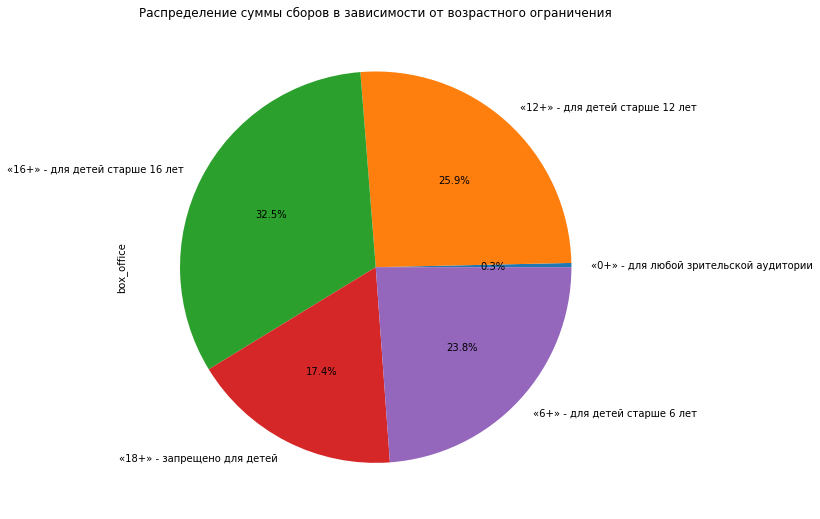

In [34]:
age_restriction_year.groupby('age_restriction')['box_office'].sum().plot(kind='pie', figsize=(9, 9), autopct='%1.1f%%')

plt.title('Распределение суммы сборов в зависимости от возрастного ограничения')

В период с 2015 по 2019 год больше всего денег в прокате собрали фильмы с возрастным ограниечением «16+», «12+», «6+». Меньше всего фильмы с возрастным ограничением «0+».

In [35]:
# Создаем сводную таблицу с суммой сборов по годам для различных возрастных ограничений
sum_age_restriction_year = age_restriction_year.pivot_table(index='age_restriction', columns='show_start_year', 
                                            values='box_office', aggfunc = ['sum'])

# Переименовываем стобцы sum_age_restriction_year
sum_age_restriction_year.columns = ['2015', '2016', '2017', '2018', '2019']
sum_age_restriction_year

,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,"379,054,578.37","150,228,848.67","229,598,930.00","32,449,002.11","17,746,066.82"
«12+» - для детей старше 12 лет,"13,616,082,008.91","12,204,446,524.39","7,851,427,660.67","14,267,291,660.69","12,680,198,773.67"
«16+» - для детей старше 16 лет,"11,368,120,870.27","16,664,548,541.74","18,745,042,900.06","16,503,602,346.96","12,753,418,984.60"
«18+» - запрещено для детей,"5,432,308,367.44","6,793,929,818.87","9,651,495,581.02","8,760,085,501.15","10,121,796,303.64"
«6+» - для детей старше 6 лет,"8,701,799,371.41","12,053,146,008.24","12,086,142,145.76","10,104,974,623.41","12,852,548,650.86"


In [36]:
display(age_restriction_year.pivot_table(index='age_restriction', columns='show_start_year', 
                                            values='box_office', aggfunc = ['count']))

count                    
show_start_year                         2015 2016 2017 2018 2019
age_restriction                                                 
«0+» - для любой зрительской аудитории    39   41    3    5    3
«12+» - для детей старше 12 лет           73   82   41   67   85
«16+» - для детей старше 16 лет          168  182  121  156  178
«18+» - запрещено для детей              132  151  147  179  183
«6+» - для детей старше 6 лет             53   70   45   68   81

Картина в зависимости от года меняется не сильно. Больше всего денег в прокате собрали фильмы с возрастным ограниечением «16+», «12+», «6+». Меньше всего фильмы с возрастным ограничением «0+». Однако сумма сборов меняется год от года в зависимости от возрастного ограничения. Так, сборы фильмов «18+» с 2015 г. только увеличивались, в 2015г. составляли 5 млрд. 433 млн., а в 2019 - 10 млрд. 121 млн., а для фильмов «16+» рекорд по сборам был в 2017 г., после чего сборы сравнялись с уровнем 2015 года. Причиной роста сборов фильмов «18+» является увеличение фильмов, вышедших в прокат с 132 фильмов в 2015, до 183 в 2019. Для фильмов  «16+» рекорд по сборам был в 2017 г., однако в этот  год в прокат вышло меньше всего фильмов, а сумма сборов рекордная. Причиной рекордных сборов может быть больший интерес зрителя к вышедшим картинам.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [37]:
# Создаем срез с фильмами, получившими государственную поддержку
films_with_state_support = mkrf_new.query('state_support > 0')
films_with_state_support.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,name_producer,name_genres,state_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,А.Атанесян,драма,33.37
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,6.60,unknown,"28,140.00",2014,А.Тютрюмов,unknown,70.00
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,61.27
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",2014,Л.Антонова,драма,69.01
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",2014,А.Миндадзе,драма,62.48


In [38]:
# Считаем сумму государственной поддержки.
display((films_with_state_support['refundable_support'] + films_with_state_support['nonrefundable_support']).sum())

20200688312.0

In [39]:
# Считаем объём возвратных средств государственной поддержки.
display(films_with_state_support['refundable_support'].sum())

3939000000.0

In [40]:
# Считаем объём невозвратных средств государственной поддержки.
display(films_with_state_support['nonrefundable_support'].sum())

16261688312.0

In [41]:
# Считаем сумму кассовых сборов
display(films_with_state_support['box_office'].sum())


42113509574.78

In [42]:
# Считаем сумму бюджета фильмов.
display(films_with_state_support['budget'].sum())

43632235404.0

In [43]:
display((films_with_state_support['refundable_support'] + films_with_state_support['nonrefundable_support']).sum() / 
        films_with_state_support['budget'].sum() * 100)

46.29762405010332

Всего имеется 332 фильма, получивших государственную поддержку. Общий бюджет фильмов 43 млрд. 632 млн. Объем государственной поддержки составляет 20 млрд. 200 млн., что составляет 46% от общего бюджета фильмов, из них объём возвратных средств государственной поддержки 3 млрд. 939 млн. При этом сумма кассовых сборов составляет 42 млрд. 113 млн., что меньше суммы бюджета этих фильмов. Если брать в целом, то фильмы с государственной поддержкой являются убыточными.

In [44]:
# Создаем срез с фильмами, бюджет которых меньше суммы кассовых сборов.
display(films_with_state_support.query('budget > box_office').head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,name_producer,name_genres,state_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,А.Атанесян,драма,33.37
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,6.60,unknown,"28,140.00",2014,А.Тютрюмов,unknown,70.00
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,61.27
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",2014,Л.Антонова,драма,69.01
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",2014,А.Миндадзе,драма,62.48


In [45]:
# Создаем срез с фильмами, сборы которых меньше бъёма возвратных средств государственной поддержки.
display(films_with_state_support.query('refundable_support > box_office').head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,name_producer,name_genres,state_support
2538,Наследники (2015),111018515,2015-10-22 12:00:00+00:00,Художественный,"Культурный фонд ""Кино-телекомпания ""Православн...",Россия,В.Хотиненко,"С.Кравец, В.Хотиненко",«16+» - для детей старше 16 лет,"7,153,119.00","28,000,000.00","50,218,741.00","Министерство культуры, Фонд кино",6.10,"мюзикл,фэнтези,комедия","194,780.00",2015,С.Кравец,мюзикл,70.00
2683,Дабл трабл,111009215,2015-05-18 12:00:00+00:00,Художественный,"ООО ""ТаББаК"", ООО ""Весёлая Компания""",Россия,Э.Оганесян,"Т.Бекмамбетов, М.Затуловская",«12+» - для детей старше 12 лет,"44,000,000.00",0.00,"64,030,080.00",Фонд кино,4.30,"комедия,мелодрама","19,654,526.30",2015,Т.Бекмамбетов,комедия,68.72
2723,Чистое искусство.,111008715,2015-05-05 12:00:00+00:00,Художественный,"ООО ""КОМПАНИЯ ""РЕАЛ-ДАКОТА""",Россия,Р.Давлетьяров,Р.Давлетьяров,«16+» - для детей старше 16 лет,"15,000,000.00","60,000,000.00","111,736,163.00",Фонд кино,5.90,"триллер,детектив","6,457,303.02",2015,Р.Давлетьяров,триллер,67.12
2733,Неуловимые: последний герой,111017415,2015-09-30 12:00:00+00:00,Художественный,"ООО ""Энджой мувиз"", ООО ""Ультра стори""",Россия,А.Аксененко,"Г.Малков, В.Поляков, И.Капитонов, В.Муругов",«16+» - для детей старше 16 лет,"25,000,000.00",0.00,"73,379,554.00",Фонд кино,3.30,"мелодрама,криминал","11,034,433.20",2015,Г.Малков,мелодрама,34.07
2769,Коробка.,111013215,2015-08-21 12:00:00+00:00,Художественный,"ООО ""Телесто-фильм""",Россия,Э.Бордуков,"Е.Гликман, М.Дегтярь, Я.Живов",«12+» - для детей старше 12 лет,"10,000,000.00","24,450,000.00","58,078,451.00","Министерство культуры, Фонд кино",6.90,"драма,спорт,комедия","9,977,812.50",2015,Е.Гликман,драма,59.32


Всего имеется 332 фильма, получивших государственную поддержку, из низ у 239 фильмов бюджет превышает сумму сборов, а у 26 фильмов сборы меньше объема возвратных средств государственной поддержки. 72% фильмов, получивших государственную поддержку, являются убыточными.

In [46]:
display(films_with_state_support.groupby('show_start_year')['ratings'].mean())

show_start_year
2013   6.70
2014   6.04
2015   6.10
2016   5.74
2017   6.03
2018   6.03
2019   6.19
Name: ratings, dtype: float64

In [47]:
# Выводим средний рейтинг фильмов, получивших государственную поддержку.
display(films_with_state_support['ratings'].describe().to_frame())

,ratings
count,332.00
mean,6.03
std,1.10
min,1.00
25%,5.40
50%,6.20
75%,6.70
max,8.50


In [48]:
# Выводим средний рейтинг всех фильмов.
display(mkrf_new['ratings'].describe().to_frame())

,ratings
count,"7,486.00"
mean,6.50
std,1.03
min,1.00
25%,6.00
50%,6.60
75%,7.10
max,9.20


Средний рейтинг фильмов, получивших государственную поддержку равен 6, в то время как средний рейтинг всех фильмов составляет 6.48. Максимальный рейтинг фильмов, получивших государственную поддержку равен 8,5, в то время как максимальный рейтинг всех фильмов составляет 9.2, что свидетельствует о незаинтересованности зрителя к фильмам, получившим государственную поддержку. В 2015 интерес к фильмам был самый минимальный, средний рейтинг фильмов, вышедших в 2016 составляет 5.74.

### Шаг 5. Напишите общий вывод

- 2010 является рекордным годом по количеству фильмов, вышедших в прокат - 985 фильмов. В 2011-2013 годах был застой, в эти года выходило по 590-630 фильмов, после чего в 2014 был рост до 807 с коррекцией в 2015 до 705, в 2016 значения вернулись до 818. В 2017 был большой спад, в прокат вышло всего 505 фильмов, что сало абсолютным минимумом за десятилетие. В 2018-2019 количество фильмов, вышедших в прокат, начало расти и стремится к уровну 2010 г.;
- с 2013 по 2017 наблюдался рост сборов от прокатов фильмов. с 2017 г. сборы от проката примерно одинаковые. Минимальная сумма сборов зафиксирорвана в 2010 г., а максимальная в 2018 г. Однако эти данные не могут считаться объективными, так как имеется 57% пропусков в столбце со сборами. К тому же, 2010 г. был рекордным по количеству прокатов фильмов, даже с учетом инфляции сумма сборов в 2010 не может быть минимальной;
- в период с 2015 по 2019 год больше всего денег в прокате собрали фильмы с возрастным ограниечением «16+», «12+», «6+». Меньше всего фильмы с возрастным ограничением «0+».
- картина в зависимости от года меняется не сильно. Больше всего денег в прокате собрали фильмы с возрастным ограниечением «16+», «12+», «6+». Меньше всего фильмы с возрастным ограничением «0+». Однако сумма сборов меняется год от года в зависимости от возрастного ограничения. Так, сборы фильмов «18+» с 2015 г. только увеличивались, в 2015г. составляли 5 млрд. 433 млн., а в 2019 - 10 млрд. 121 млн., а для фильмов «16+» рекорд по сборам был в 2017 г., после чего сборы сравнялись с уровнем 2015 года. Причиной роста сборов фильмов «18+» является увеличение фильмов, вышедших в прокат с 132 фильмов в 2015, до 183 в 2019. Для фильмов «16+» рекорд по сборам был в 2017 г., однако в этот год в прокат вышло меньше всего фильмов, а сумма сборов рекордная. Причиной рекордных сборов может быть больший интерес зрителя к вышедшим картинам;
- всего имеется 332 фильма, получивших государственную поддержку. Общий бюджет фильмов 43 млрд. 632 млн. Объем государственной поддержки составляет 20 млрд. 200 млн., что составляет 46% от общего бюджета фильмов, из них объём возвратных средств государственной поддержки 3 млрд. 939 млн. При этом сумма кассовых сборов составляет 42 млрд. 113 млн., что меньше суммы бюджета этих фильмов. Если брать в целом, то фильмы с государственной поддержкой являются убыточными.
- у 239 фильмов бюджет превышает сумму сборов, а у 26 фильмов сборы меньше объема возвратных средств государственной поддержки. 72% фильмов, получивших государственную поддержку, являются убыточными;
- Средний рейтинг фильмов, получивших государственную поддержку равен 6, в то время как средний рейтинг всех фильмов составляет 6.48. Максимальный рейтинг фильмов, получивших государственную поддержку равен 8,5, в то время как максимальный рейтинг всех фильмов составляет 9.2, что свидетельствует о незаинтересованности зрителя к фильмам, получившим государственную поддержку.